# <center><a href='https://mybinder.org/v2/gh/fortierq/binder-mp2i/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fmp2i-fsm%252Fmp2i-2021%26urlpath%3Dlab%252Ftree%252Fmp2i-2021%252F1_ocaml%252F4_recursivite.ipynb%26branch%3Dmain'>Récursivité                                                                     <img src=https://mybinder.org/badge.svg></a></center>

La récursivité est la possibilité pour une fonction de s'appeller soi-même. En général, il y a deux étapes pour écrire une fonction récursive :
1. Un **cas de base** où la fonction renvoie directement une valeur.
2. Un **cas général** où la fonction s'appelle sur des paramètres "plus petits".

En OCaml, une fonction récursive doit être définie par `let rec ...`. Voici un exemple :

In [1]:
let rec f x = (* exemple de fonction récursive *)
    if x = 0 then print_newline () (* cas de base *)
    else (print_int x; 
          f (x - 1)) (* cas général *)

val f : int -> unit = <fun>


`f x` affiche un retour à la ligne si `x` est égal à 0, et sinon affiche `x` puis appelle `f (x - 1)`.

Essayons cette fonction :

In [2]:
f 2

21


- : unit = ()


Voici ce qui se passe lors de cet appel `f 2` :  

1. On regarde si `2 = 0`, ce qui est faux. On passe donc dans le `else`.
2. On affiche `2` avec `print_int x`.
3. On appelle `f` sur la valeur 1. Le calcul de `f 2` se met en pause et on exécute `f 1`. Quand `f 1` sera terminé, l'appel de `f 2` continuera et `f 1` sera remplacé par sa valeur de retour. 
4. L'exécution de `f 1` affiche `1` puis appelle `f 0`. Le calcul de `f 1` se met en pause et on exécute `f 0`. Quand `f 0` sera terminé, l'appel de `f 2` continuera et `f 0` sera remplacé par sa valeur de retour.
5. `f 0` exécute `print_newline ()` et s'arrête (en renvoyant `()`).
6. L'exécution de `f 1` reprend et `f 1` s'arrête.
7. L'exécution de `f 2` reprend et `f 2` s'arrête.

Vous pouvez visualiser l'exécution d'un code similaire en Python avec [Python Tutor](http://www.pythontutor.com/visualize.html#code=def%20f%28n%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%0A%20%20%20%20print%28n%29%0A%20%20%20%20f%28n-1%29%0A%0Af%284%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false). Il est important de bien comprendre comment les appels récursifs s'effectuent.

Un exemple classique d'utilisation de la récursivité est le calcul de la factorielle d'un entier $n$, définie par $n! = n \times (n - 1) \times ... \times 2 \times 1$.  
Pour définir une fonction récursive calculant $n!$ on a besoin de deux choses :
- **Cas de base**  : si $n = 0$, on peut renvoyer directement 1 (par convention $0! = 1$), sans appel récursif.
- **Cas général/récurrence** : si $n$ est quelconque, il faut rammener le calcul de $n!$ à un calcul d'une factorielle plus petite (de façon à se rapprocher du cas de base). Pour cela, on peut remarquer que $n! = n\times (n-1)!$ et donc que calculer $(n-1)!$ permet d'en déduire $n!$.  
On en déduit le code suivant :

In [3]:
let rec fact n =
    if n = 0 then 1 (* par convention 0! = 1 *)
    else n*fact (n - 1)

val fact : int -> int = <fun>


In [4]:
fact 4

- : int = 24


**Remarque** : Si on oublie le cas de base (`if n = 0`) la fonction ne s'arrête jamais (`fact 0` appelerait `fact (-1)` qui appelerait `fact (-2)` et ainsi de suite...) !

Écrire une fonction récursive ressemble beaucoup à écrire une démonstration mathématiques par récurrence et d'ailleurs on utilisera souvent une démonstration par récurrence pour démontrer qu'une fonction récursive est correcte, c'est à dire renvoie bien la bonne valeur.  
Par exemple, pour démontrer que `fact` est correcte, on peut poser l'hypothèse de récurrence :
$$\mathcal{H}(n) : \text{fact } n \text{ renvoie } n!$$
**Preuve** :
1. $\mathcal{H}(0)$ est vraie car `fact 0` renvoie 1 et, par définition, $0! = 1$.  
2. Soit $n$ un entier strictement positif. Supposons $\mathcal{H}(n - 1)$ et montrons $\mathcal{H}(n)$.  
Comme $n > 0$, `fact n` renvoie `n*fact (n - 1)`. D'après $\mathcal{H}(n - 1)$, `fact (n - 1)` renvoie $(n - 1)!$. Donc `fact n` renvoie $n(n - 1)! = n!$, ce qui démontre $\mathcal{H}(n)$.  
D'après le principe de récurrence, $\mathcal{H}(n)$ est vraie pour tout $n \in \mathbb{N}$. 

**Exercice** : Qu'affiche le code suivant? Le deviner puis exécuter le code pour vérifier.
```ocaml
let rec f x =
    if x = 0 then print_newline ()
    else (f (x - 1);
          print_int x) in
f 5    
```

In [5]:
let rec f x =
    if x = 0 then print_newline ()
    else (f (x - 1);
          print_int x) in
f 5    

- : unit = ()


**Exercice** : 
1. Écrire une fonction récursive pour calculer la somme des $n$ premiers entiers $S(n) = 0 + 1 + 2 + ... + (n - 1)$.
2. Quelle formule connaissez-vous pour calculer $S(n)$? En déduire une autre fonction (non récursive) pour calculer cette valeur. Vérifier sur des exemples que les deux fonctions donnent la même valeur. 

In [6]:
(* 1. *)
let rec somme n =
    if n = 1 then 1 (* S(1) = 1 *)
    else n + somme (n - 1);; (* on utilise S(n) = n + S(n - 1) *)

(* 2. *)
let somme2 n =
    n*(n+1)/2;; (* on utilise la formule de Gauss *)
    
somme 42 = somme2 42 (* vérification *)

val somme : int -> int = <fun>


val somme2 : int -> int = <fun>


- : bool = true


Une application classique de la récursivité est le calcul des termes d'une suite récurrente.  
Par exemple :
$$\begin{cases} 
u_{n} = 3u_{n-1} + 2, \text{si } n > 0\\
u_0 = 5
\end{cases}$$

Cette définition par récurrence se traduit naturellement en fonction récursive :

In [7]:
let rec u n = 
    if n = 0 then 5
    else 3*(u (n - 1)) + 2

val u : int -> int = <fun>


In [8]:
u 10

- : int = 354293


**Exercice** : calculer $v_{10}$, où $v_n$ est définie par
$$\begin{cases} 
v_{n+1} = \sqrt{v_{n}} + 4, \text{si } n > 0\\
v_1 = 5
\end{cases}$$

In [9]:
let rec v n = 
    if n = 1 then 5. 
    else (v (n - 1))**0.5 +. 4. in (* le résultat est un flottant à cause de la racine *)
v 10

- : float = 6.56155211605287


Un autre exemple classique est la suite de Fibonacci :
$$u_0 = 1$$
$$u_1 = 1$$
$$u_n = u_{n - 1} + u_{n - 2}$$

On pourrait l'implémenter de la façon suivante :

In [10]:
let rec fibo n =
    if n <= 1 then 1
    else fibo (n - 1) + fibo (n - 2) in
fibo 10

- : int = 89


**Attention : cette méthode est très inefficace. Pour s'en convaincre, regardons visuellement les appels récursifs de fibo :**

<center><img src=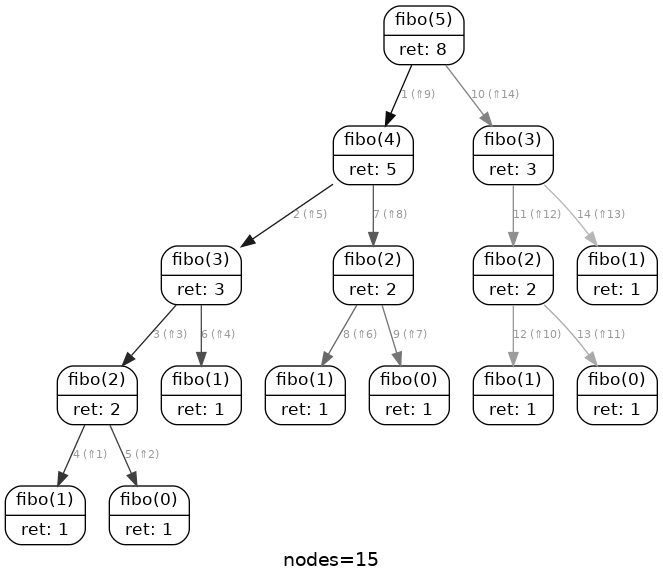 width=450></center>

Il y a de nombreux calculs inutiles : par exemple, `fibo 3` est appelé 2 fois et `fibo 2` est appelé 3 fois, ce qui est inefficace. 

**Exercice** : Montrer que le nombre d'appels récursifs pour calculer `fibo n` est exponentiel en $n$ (c'est à dire supérieur à $a^n$ pour un certain $a$ indépendant de $n$).

Soit $C_{n}$ le nombre d'appels récursifs effectués par `fibo n` (on compte l'appel de `fibo n` ainsi que tous ses sous-appels récursifs). Alors : 
$$C_{n} = \underbrace{C_{n-1}}_{\text{appels récursifs de  fibo (n-1)}} + \underbrace{C_{n-2}}_{\text{appels récursifs de fibo (n-2)}}$$
$C_{n}$ vérifie donc la même équation de récurrence que la suite de Fibonacci. Pour donner un minorant simplement, on peut remarquer que $C_{n-1} \geq C_{n - 2}$ (car $C_{n-1} = C_{n - 2} + \underbrace{C_{n - 3}}_{\geq 0}$) donc $C_{n} \geq 2 C_{n - 2}$ et en appliquant cette inégalité plusieurs fois :
$$C_{n} \geq 2 C_{n - 2} \geq 2^2 C_{n - 4} \geq 2^3 C_{n - 6} \geq ... \geq 2^\frac{n}{2} C_{n - 2\frac{n}{2}} = 2^\frac{n}{2}$$
On a donc montré que $\boxed{\forall n \in \mathbb{N}, C_{n} \geq 2^\frac{n}{2}}$ : `fibo n` effectue un nombre exponentiel (en $n$) d'appels récursifs.

Il est possible d'éviter ces appels inutiles en utilisant un **accumulateur**. Un accumulateur est un argument d'une fonction récursive que l'on va utiliser pour construire le résultat final. L'accumulateur est modifié à chaque appel récursif.

In [11]:
let rec fibo2 n a b =
  (* n est le nombre de termes restants à calculer *)
  (* a est le dernier terme calculé de la suite *)
  (* b est l'avant-dernier terme calculé *)
  if n = 0 then b
  else fibo2 (n - 1) (a + b) a in (* les derniers termes deviennent a+b et a *)
fibo2 10 1 1

- : int = 89


On verra aussi plus tard une technique de **mémoïsation** permettant d'éviter de faire 2x le même appel récursif, de façon systématique.

Bien sûr, on pourrait aussi utiliser une boucle `for` en stockant les deux derniers termes de la suite dans des variables, mais l'objectif ici est de s'entraîner à penser récursivement.  

## Sous-fonction récursive

Quand on souhaite écrire une fonction `f x` en utilisant une méthode récursive mais que `x` doit être accessible dans les appels récursifs, on peut utiliser une sous-fonction récursive dans `f`, et `f` se contentera d'appeler cette fonction.  

Par exemple, pour savoir si un entier est premier :

In [12]:
let premier n =
    let rec f k =  (* renvoie true si n n'a pas de diviseurs entre 2 et k *)
        if k = 1 then true  (* on a regardé tous les diviseurs potentiels *)
        else if n mod k = 0 then false  (* si k divise n *)
        else f (k - 1) in (* vérifie que n n'a pas de diviseurs entre 2 et k *)
    f (n - 1)  (* teste si n a un diviseur entre 2 et n - 1 *)

val premier : int -> bool = <fun>


In [13]:
premier 2 && premier 3 && not (premier 4)  (* test *)

- : bool = true
